<a href="https://colab.research.google.com/github/Yordi23/Machine_Learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
titanic_train = pd.read_csv('/content/drive/My Drive/Fuse Machines/titanic_train.csv')
titanic_test = pd.read_csv('/content/drive/My Drive/Fuse Machines/titanic_test.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Analysis

From this table we can already see that the survival rate is about 38%.

In [0]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Pclass
In this graph we can see that the Pclass affected the survival rate. Most of the people from the Pclass #3 died.


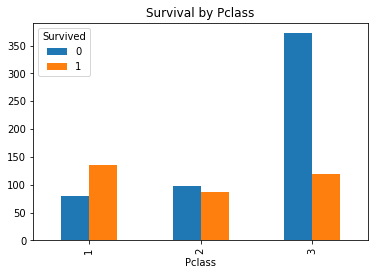

In [0]:
titanic_train.groupby(['Pclass','Survived']).count()['PassengerId'].unstack().plot.bar(title= 'Survival by Pclass')

### Sex
For men the survival rate was very low, while for women it was less abrupt.

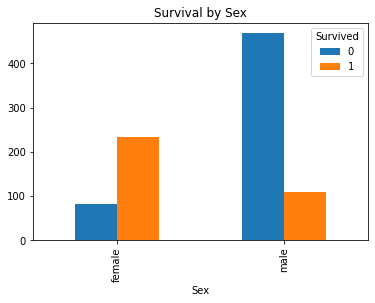

In [0]:
titanic_train.groupby(['Sex','Survived']).count()['PassengerId'].unstack().plot.bar(title= 'Survival by Sex')

### Age
Here we can see the survival rate between ages both for males and females.

In [0]:
def plotHist(Sex):
  Survived= titanic_train[(titanic_train['Sex'] == Sex) & (titanic_train['Survived'] == 1)]['Age']
  Not_Survived = titanic_train[(titanic_train['Sex'] == Sex) & (titanic_train['Survived'] == 0)]['Age']

  plt.hist(Survived.dropna(), bins = 35, alpha=0.5, label = 'Survived')
  plt.hist(Not_Survived.dropna(), bins = 35, alpha=0.5, label = 'Not Survived')

  plt.xlabel('Age')
  plt.ylabel('# of People')

  plt.title(Sex.capitalize() + ' survival rate by age')
  plt.legend()
  plt.show()

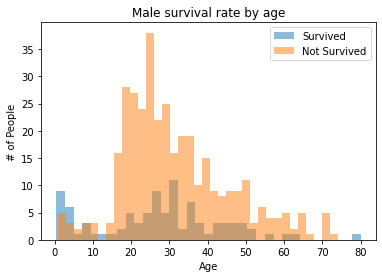

In [0]:
plotHist('male')

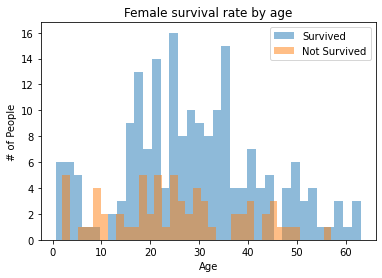

In [0]:
plotHist('female')

### Embarked
The port where the person embarked had a great impact on the survival rate. Being the S the port with the highest mortality for men. For women, we can almost say happened the opposite for each port.

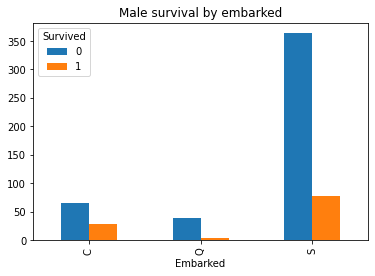

In [0]:
titanic_train[titanic_train['Sex'] == 'male'].groupby(['Embarked','Survived']).count()['PassengerId'].unstack().plot.bar(title= 'Male survival by embarked')

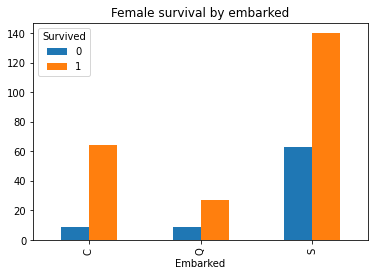

In [0]:
titanic_train[titanic_train['Sex'] == 'female'].groupby(['Embarked','Survived']).count()['PassengerId'].unstack().plot.bar(title= 'Female survival by embarked')

# Preprocessing

There are a lot of missing values in Cabin, at least for me, it is going to be difficult to handle that. Also, we'll have to deal with Age and Embarked, but those should be easier to handle.

In [0]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We'll fill missing age values with the mean. Then round up the number and convert to integer.

In [0]:
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
age_mean = titanic_train['Age'].mean()
titanic_train['Age'] = titanic_train['Age'].fillna(age_mean).round(0).astype(int)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


We'll fill missing age data with the most frequent value.

In [0]:
titanic_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [0]:
mode = titanic_train['Embarked'].mode()[0]
titanic_train['Embarked'] = titanic_train['Embarked'].fillna(mode)

Now I'll map the Sex and Embarked feature to numbers.


In [0]:
Sex = {"male": 0, "female": 1}
titanic_train['Sex'] = titanic_train['Sex'].map(Sex)

Embarked = {"S": 0, "C": 1, "Q": 2}
titanic_train['Embarked'] = titanic_train['Embarked'].map(Embarked)

titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,30,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,1


Since there are too many missing values of the Cabin feature, we'll just drop out that column. Also we'll drop PassengerId, Name and Ticket column

In [0]:
titanic_train = titanic_train.drop(['Cabin','PassengerId','Name','Ticket'], axis = 1)

In [0]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0
887,1,1,1,19,0,0,30.0000,0
888,0,3,1,30,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1


# Model Training

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [0]:
#Data split
X = titanic_train.drop(['Survived'],axis = 1)
Y = titanic_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
570,2,0,62,0,0,10.5000,0
805,3,0,31,0,0,7.7750,0
635,2,1,28,0,0,13.0000,0
85,3,1,33,3,0,15.8500,0
871,1,1,47,1,1,52.5542,0
...,...,...,...,...,...,...,...
386,3,0,1,5,2,46.9000,0
861,2,0,21,1,0,11.5000,0
797,3,1,31,0,0,8.6833,0
530,2,1,2,1,1,26.0000,0


In [0]:
def showResult(title,score):
  print(title)
  print(score)

  print('\n\nConfusion matrix')
  print(confusion_matrix(y_test, y_pred))

  print('\n\nClassification report\n')
  print(classification_report(y_test, y_pred))

## K-Nearest Neighbors

In [0]:
#Data normalization
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.41378048, -0.72882288,  2.55365169, ..., -0.45823306,
        -0.43507729, -0.55379714],
       [ 0.79364452, -0.72882288,  0.12174937, ..., -0.45823306,
        -0.49372537, -0.55379714],
       [-0.41378048,  1.37207547, -0.11359602, ..., -0.45823306,
        -0.38127171, -0.55379714],
       ...,
       [ 0.79364452,  1.37207547,  0.12174937, ..., -0.45823306,
        -0.47417673, -0.55379714],
       [-0.41378048,  1.37207547, -2.15325603, ...,  0.75014448,
        -0.10148269, -0.55379714],
       [ 0.79364452, -0.72882288,  0.04330091, ..., -0.45823306,
         0.55485501, -0.55379714]])

In [0]:
error = []

# Calculating error for K values between 1 and 100
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

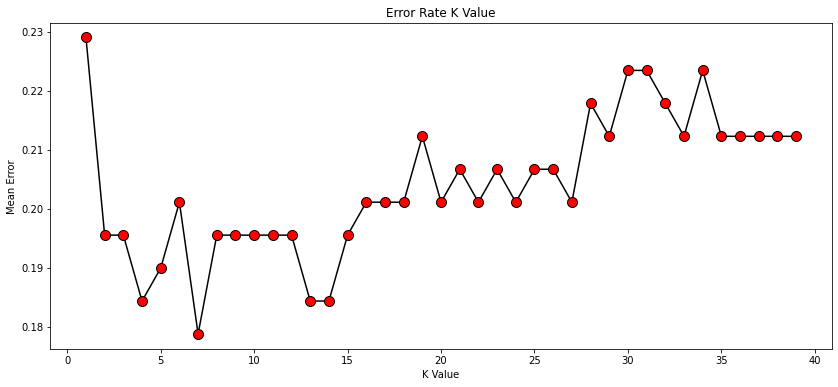

In [0]:
plt.figure(figsize=(14, 6))
plt.plot(range(1, 40), error, color='black', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
#Model Training
knc = KNeighborsClassifier(n_neighbors=11)
knc.fit(X_train, y_train)

#Model prediction
y_pred = knc.predict(X_test)

#Show Results
knc_score = round(knc.score(X_train, y_train),4)
showResult('K-Nearest Neighbors score',knc_score)

K-Nearest Neighbors score
0.8371


Confusion matrix
[[89 15]
 [20 55]]


Classification report

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.79      0.73      0.76        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Logistic Regression

In [0]:
#Model Training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Model prediction
y_pred = log_reg.predict(X_test)

#Show Results
log_reg_score = round(log_reg.score(X_train, y_train), 4)
showResult('Logistic Regression score',log_reg_score)

Logistic Regression score
0.7992


Confusion matrix
[[91 13]
 [22 53]]


Classification report

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.80      0.71      0.75        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Random Forest

In [0]:
#Model Training
random_forest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
random_forest.fit(X_train, y_train)

#Model prediction
y_pred = random_forest.predict(X_test)

#Show Results
random_forest_score = round(random_forest.score(X_train, y_train), 4)
showResult('Random Forest score',random_forest_score)

Random Forest score
0.9846


Confusion matrix
[[88 16]
 [15 60]]


Classification report

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.79      0.80      0.79        75

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



According to what I found, the previous score of 98.03% may not be that reliable, so we'll use K-Fold Cross Validation to get a more realistic value.

In [0]:
#Using K-Fold Cross Validation
random_forest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")

rf_mean_score =  round(scores.mean(),2)


In [0]:
scores

array([0.77777778, 0.80555556, 0.81690141, 0.76056338, 0.76056338,
       0.88732394, 0.8028169 , 0.83098592, 0.78873239, 0.76056338])

In [0]:
print("Mean:",rf_mean_score)
print("Standard Deviation:", round(scores.std(),2))

Mean: 0.8
Standard Deviation: 0.04


In [0]:

print('Random Forest model average accuracy is of', (rf_mean_score*100),'%.')

Random Forest model average accuracy is of 80.0 %.


# Conclutions

In [0]:
models_scores = {
    'score' : ['K-Nearest Neighbors', 'Logistic Regression', 'Random Forest'],
    'model' : [knc_score, log_reg_score, rf_mean_score]
}

df_scores = pd.DataFrame(models_scores) 
df_scores

,score,model
0,K-Nearest Neighbors,0.8371
1,Logistic Regression,0.7992
2,Random Forest,0.8000


K-Nearest Neighbors seems to be the best model out of all, it has the best score and we can see from the confusion matrix report that it has decent precision over both classes.